In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Para renderear el texto de los gráficos de matplotlib con LaTeX, descomentar plt.rcdefaults() para desctivarlo
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcdefaults()

df = pd.read_csv("output.csv")
df.head()
df.shape


(110, 7)

In [29]:
df['#SEQ'] = range(df.shape[0])

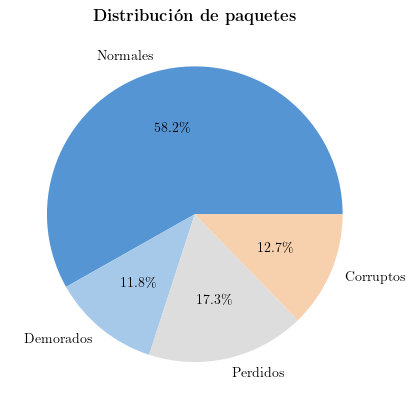

In [145]:
cant_enviados = df.shape[0]
cant_recibidos = (df['time_received'] != 0).sum()
cant_corruptos = (df['corrupto'] == 1).sum()
cant_demorados = (df['demorado'] == 1).sum()
cant_perdidos = (df['perdido'] == 1).sum()
cant_normal = cant_enviados - cant_perdidos - cant_corruptos - cant_demorados

proporciones = {'Normales': cant_normal, 'Demorados': cant_demorados,
                'Perdidos': cant_perdidos, 'Corruptos': cant_corruptos}

proporciones = {key: 100*value/cant_enviados for key, value in proporciones.items()}

colors = ['#5595D4', '#A7C9E9', '#DDDDDD', '#F7D0AE', '#EDA060']

plt.pie(list(proporciones.values()), labels=list(proporciones.keys()), autopct='%1.1f%%', colors=colors)
plt.title(r'\textbf{Distribución de paquetes}')
plt.show()

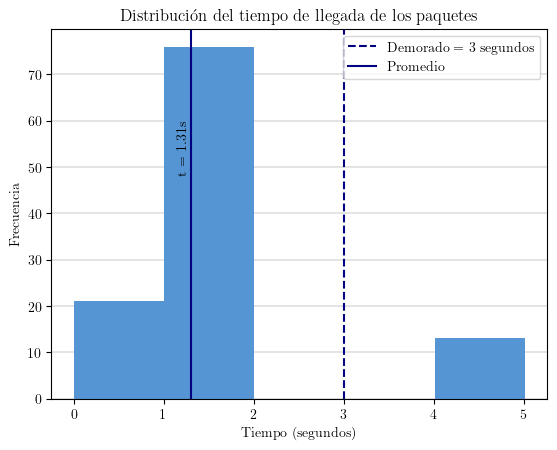

In [142]:
plt.hist(df['total_time'], bins=5, color=colors[0], zorder=2)
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Frecuencia')
plt.title('Distribución del tiempo de llegada de los paquetes')
plt.grid(axis='y', linewidth=0.3, color='grey', zorder=0)

# Add a vertical line at x = 3 (or any value you want)
plt.axvline(x=3, color='navy', linestyle='--', label='Demorado = 3 segundos')
promedio_tiempo = np.mean(df['total_time'])
plt.axvline(x=promedio_tiempo, color='navy', linestyle='-', label='Promedio')

plt.text(promedio_tiempo-0.1, 60, f't = {round(promedio_tiempo, 2)}s', 
         color='black', fontsize=10, ha='center', va='top', rotation=90)

plt.legend()

plt.show()